# <center>Data Science Jobs Market Analysis</center>
<center> In this project, the data is gathered from Indeed.com's website for the top 4 Data related positions. There are some interesting facts 

### Loading dependencies

In [1064]:
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.util import ngrams
from nltk.util import bigrams
from nltk.collocations import *
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn

### Loading the files
The data is collected in csv files by running the web crawling script named main.py. We are using the data from multiple csv files to aggregate into one single dataframe

In [1065]:
da_ny = pd.read_csv('jobs_1.csv')
ba_ny = pd.read_csv('jobs_2.csv')
ds_ny = pd.read_csv('jobs_3.csv')
de_ny = pd.read_csv('jobs_4.csv')
da_bo = pd.read_csv('jobs_5.csv')
ba_bo = pd.read_csv('jobs_6.csv')
ds_bo = pd.read_csv('jobs_7.csv')
de_bo = pd.read_csv('jobs_8.csv')
da_ch = pd.read_csv('jobs_9.csv')
ba_ch = pd.read_csv('jobs_10.csv')
ds_ch = pd.read_csv('jobs_11.csv')
de_ch = pd.read_csv('jobs_12.csv')
ds_main = pd.concat([da_ny,ba_ny,ds_ny,de_ny,da_bo,ba_bo,ds_bo,de_bo,da_ch,ba_ch,ds_ch,de_ch],ignore_index=True)
#ds_main = pd.concat([da_ny,da_bo,da_ch],ignore_index=True)

In [1066]:
len(ds_main)

10708

### Total number of job postings and top employers

In [1067]:
total_no_company=ds_main['company_name'].nunique()
print('Total number of firms with data science job vacancies',total_no_company)

Total number of firms with data science job vacancies 2107


In [1068]:
ds_main.drop_duplicates(subset=['job_Title','company_name','summary'],inplace = True)

In [1069]:
len(ds_main)

4643

In [1070]:
ds_main.head()

,Unnamed: 0,unique_id,city,job_qry,job_title,company_name,location,summary,salary,link,date
0,1,pj_ef907b4552cef2f8,New+York,data+analyst,Junior Data Analyst,APPS Paramedical,NOT_FOUND,Junior Data Analyst. (“APPS”) has an immediate...,NOT_FOUND,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,1 day ago
1,2,pj_14ea4a336dea8400,New+York,data+analyst,Intelligence Analyst,Mulligan Security,NOT_FOUND,Share data and expertise with others. Analyze ...,\n $23 an hour,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,NOT_FOUND
2,3,pj_8a3274fdf8443647,New+York,data+analyst,Customer Data Analyst,Michael Kors,NOT_FOUND,"Customer transaction data and email data, loya...",NOT_FOUND,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,NOT_FOUND
3,4,pj_f8b0a48cd23ded65,New+York,data+analyst,Risk Data Analyst,"MoneyLion, Inc",NOT_FOUND,Perform ad-hoc data studies based on requireme...,NOT_FOUND,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,8 hours ago
4,5,pj_baf8aa4b19587683,New+York,data+analyst,"Data Analyst, Gas Materials & Standards",NATIONAL GRID CO USA (NE POWER),NOT_FOUND,Research opportunities for data acquisition an...,NOT_FOUND,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,1 day ago


In [1071]:
ds_main_cities=ds_main.filter(['job_title','location'], axis=1)

In [1072]:
ds_main_cities=ds_main_cities[ds_main_cities.location != 'NOT_FOUND']

In [1073]:
len(ds_main_cities)
ds_main_cities.head()

,job_title,location
7,Data Analyst- Ad and Brand,"New York, NY 10001 (Chelsea area)"
8,Data Analyst- Entry Level Job,"New York, NY"
9,Data Analyst,"New York, NY"
10,"Data Analyst, Mortgages","New York, NY 10010 (Gramercy area)"
11,Data Analyst,"New York, NY"


In [1074]:
ds_main_cities= ds_main_cities.groupby(['location'])['job_title'].count()

In [1075]:
ds_main_cities.head()

location
Acton, MA                                  3
Albany, NY                                12
Albany, NY 12205                           9
Albany, NY 12210 (Central Avenue area)     2
Albany, NY 12211                           1
Name: job_title, dtype: int64

In [1076]:
ds_main_cities.to_csv('jobs_cities.csv',index=True)

In [1077]:

most_vacancy= ds_main.groupby(['company_name'])['job_title'].count()
most_vacancy=most_vacancy.reset_index(name='position')
most_vacancy=most_vacancy.sort_values(['position'],ascending=False)
pareto_df=most_vacancy
most_vacancy.to_csv('jobs1.csv',index=True)
most_vacancy=most_vacancy.head(25)
print('Top 10 firms with most vacancies',most_vacancy)

Top 10 firms with most vacancies                                        company_name  position
1691                                        Spotify        45
812                                          Google        36
1000                                JP Morgan Chase        33
2010                                        Wayfair        29
584                                        Deloitte        24
1032                                           KPMG        23
1832                      The University of Chicago        22
262   Blue Cross Blue Shield of IL, MT, NM, OK & TX        21
56                                        Accenture        21
811                                   Goldman Sachs        20
2012                                         WeWork        20
716                                        Facebook        20
118                       Amazon.com Services, Inc.        20
1411                       Partners HealthCare(PHS)        18
1704                                 

Text(0,0.5,'Number of Jobs')

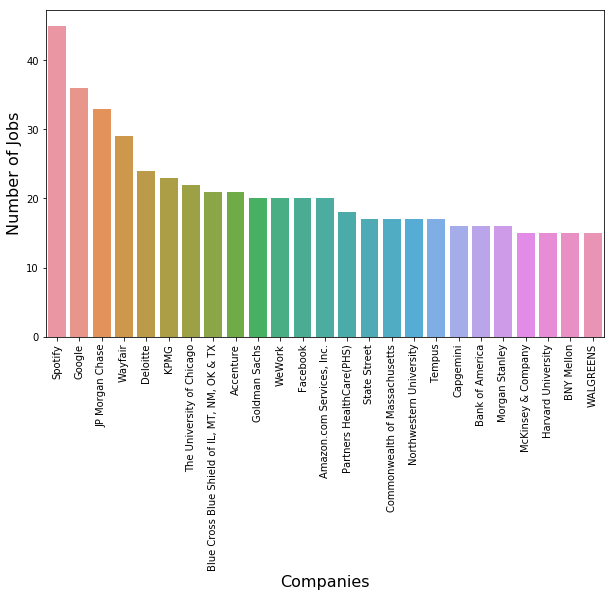

In [1078]:
fig, ax = plt.subplots(figsize = (10,6))
ax=seaborn.barplot(x="company_name", y="position", data=most_vacancy)    
ax.set_xticklabels(most_vacancy['company_name'],rotation=90)  
ax.set_xlabel('Companies',fontsize=16, color='black')
ax.set_ylabel('Number of Jobs',fontsize=16) 

In [1079]:
# Finding total number of unique roles in data science domain from the given dataset
total_no_roles=ds_main['job_title'].nunique()
print('Total number of roles across all the firms',total_no_roles)

# most offered roles across all the firms
most_offd_roles=ds_main.groupby(['job_title'])['company_name'].count()   
most_offd_roles=most_offd_roles.reset_index(name='company_name')
most_offd_roles=most_offd_roles.sort_values(['company_name'],ascending=False)

Total number of roles across all the firms 2716


Top 15 most wanted roles across firms                                  job_title  company_name
916                         Data Scientist           196
302                       Business Analyst           177
807                          Data Engineer           152
709                           Data Analyst           128
2239                 Senior Data Scientist            66
2158               Senior Business Analyst            47
2217                  Senior Data Engineer            36
492               Business Systems Analyst            31
448          Business Intelligence Analyst            27
1937                      Research Analyst            23
1550             Machine Learning Engineer            23
2210                   Senior Data Analyst            21
1511                   Lead Data Scientist            19
48                                 Analyst            16
1809                       Product Analyst            14
2620            Technical Business Analyst        

Text(0,0.5,'NO OF ROLES ACROSS INDUSTRY')

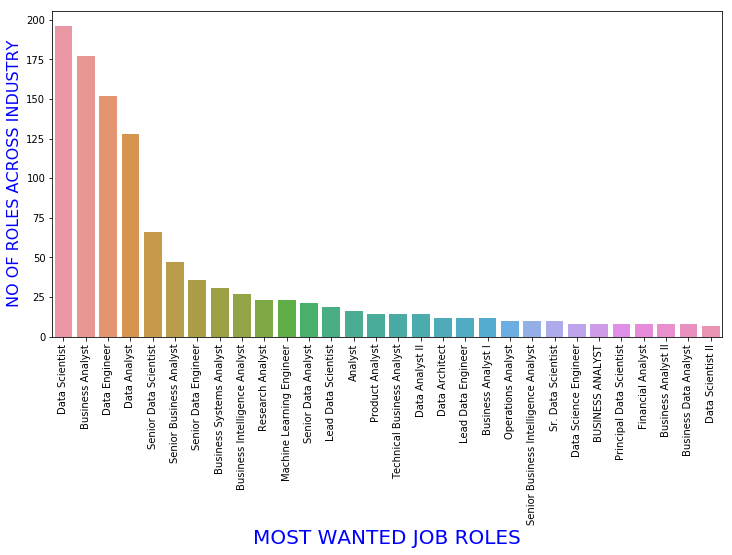

In [1080]:
most_offd_roles=most_offd_roles.head(30)   
print('Top 15 most wanted roles across firms',most_offd_roles)

most_offd_roles.to_csv('jobs2.csv',index=True)
# Plot graph for top most offered roles
fig,ax=plt.subplots(figsize=(12,6))
ax=seaborn.barplot(x="job_title", y="company_name", data=most_offd_roles)    
ax.set_xticklabels(most_offd_roles['job_title'],rotation=90)
ax.set_xlabel('MOST WANTED JOB ROLES',fontsize=20,color='blue')
ax.set_ylabel('NO OF ROLES ACROSS INDUSTRY',fontsize=16,color='blue')#

### Job Summary analysis

In [1081]:
ds_main.head()
len(ds_main)
ds_main.summary[2]

'Customer transaction data and email data, loyalty, web interaction data. The Data Analyst is responsible for understanding and advancing Michael Kors knowledge...'

In [1082]:
ds_main.drop_duplicates(subset=['job_Title','company_name','summary'],inplace = True)

In [1083]:
len(ds_main)

4643

In [1084]:
summary=ds_main['summary']

In [1085]:
summary.head(10)

0    Junior Data Analyst. (“APPS”) has an immediate...
1    Share data and expertise with others. Analyze ...
2    Customer transaction data and email data, loya...
3    Perform ad-hoc data studies based on requireme...
4    Research opportunities for data acquisition an...
5    Health Care Data Analyst. Collect, compile and...
6    Collaborate with other Business, Data, or Syst...
7    Independently managing data collection and dat...
8    Acquire data from primary or secondary data so...
9    Data Analyst *. Acquire data from primary or s...
Name: summary, dtype: object

#### Removing the punctuation and stopwords

In [1086]:
summary = summary.apply(lambda x: " ".join(x.lower() for x in x.split()))
summary = summary.str.replace('[^\w\s]','')

In [1087]:
stop = stopwords.words('english')
summary = summary.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
summary.head(10)

0    junior data analyst apps immediate opportunity...
1    share data expertise others analyze large data...
2    customer transaction data email data loyalty w...
3    perform adhoc data studies based requirements ...
4    research opportunities data acquisition resolv...
5    health care data analyst collect compile organ...
6    collaborate business data system analysts ando...
7    independently managing data collection data pr...
8    acquire data primary secondary data sources ma...
9    data analyst acquire data primary secondary da...
Name: summary, dtype: object

In [1088]:
freq = pd.Series(' '.join(summary).split()).value_counts()[:10]
freq

data          5147
business      2283
analyst       1448
experience     938
team           694
engineer       582
analysis       518
analytics      502
work           492
years          438
dtype: int64

List of frequently occuring words

In [1089]:
freq = pd.Series(' '.join(summary).split()).value_counts()[-10:]
freq

recorded          1
goods             1
urban             1
fbijobsgov        1
contains          1
ssbo              1
updated           1
lunch             1
professionally    1
bai               1
dtype: int64

List of least occuring words

#### Creating a text blob to find out most quoted n-grams

In [1090]:
freq = list(freq.index)
summary = summary.apply(lambda x: " ".join(x for x in x.split() if x not in freq))
summary.head()

0    junior data analyst apps immediate opportunity...
1    share data expertise others analyze large data...
2    customer transaction data email data loyalty w...
3    perform adhoc data studies based requirements ...
4    research opportunities data acquisition resolv...
Name: summary, dtype: object

In [1091]:
#tokens = nltk.word_tokenize(summary)
type(summary)

pandas.core.series.Series

In [1092]:
docs=(summary.tolist())
summary_text = ''.join(docs)

In [1093]:
tokens = nltk.word_tokenize(summary_text)

In [1094]:
print(len(tokens))

62658


In [1095]:
tokens_pos_tag = nltk.pos_tag(tokens)

In [1096]:
pos_df = pd.DataFrame(tokens_pos_tag, columns = ('word','POS'))

In [1097]:
pos_df.head()

,word,POS
0,junior,JJ
1,data,NNS
2,analyst,NN
3,apps,NN
4,immediate,JJ


In [1098]:
pos_sum = pos_df.groupby('POS', as_index=False).count() # group by POS tags

In [1099]:
pos_sum.sort_values(['word'], ascending=[False]) # in descending order of number of words per tag

,POS,word
10,NN,24333
13,NNS,13796
6,JJ,9743
23,VBG,4451
25,VBP,3779
17,RB,1497
26,VBZ,892
22,VBD,825
2,CD,782
24,VBN,721


In [1100]:
filtered_pos = [ ]

In [1101]:
#for one in tokens_pos_tag:
#    if one[1] == 'NN' or one[1] == 'NNS' or one[1] == 'NNP' or one[1] == 'NNPS':
#        filtered_pos.append(one)

In [1102]:
for one in tokens_pos_tag:
    if one[1] == 'NN' or one[1] == 'NNP' or one[1] == 'NNPS' or one[1] == 'JJ' or one[1] == 'NNS':
        filtered_pos.append(one)

In [1103]:
#or one[1] == 'VBG' or one[1] == 'VBP'

In [1104]:
print (len(filtered_pos))

47894


In [1105]:
fdist_pos = nltk.FreqDist(filtered_pos)

In [1106]:
top_100_words = fdist_pos.most_common(100)

In [1107]:
print(top_100_words)

[(('data', 'NNS'), 4222), (('business', 'NN'), 1979), (('analyst', 'NN'), 1373), (('experience', 'NN'), 550), (('team', 'NN'), 542), (('analysis', 'NN'), 457), (('analytics', 'NNS'), 455), (('years', 'NNS'), 433), (('engineer', 'NN'), 403), (('scientists', 'NNS'), 366), (('engineers', 'NNS'), 330), (('machine', 'NN'), 326), (('management', 'NN'), 297), (('work', 'NN'), 295), (('science', 'NN'), 290), (('support', 'NN'), 283), (('systems', 'NNS'), 257), (('responsible', 'JJ'), 242), (('development', 'NN'), 228), (('research', 'NN'), 223), (('requirements', 'NNS'), 207), (('analysts', 'NNS'), 207), (('new', 'JJ'), 197), (('role', 'NN'), 196), (('solutions', 'NNS'), 195), (('scientist', 'NN'), 191), (('senior', 'JJ'), 189), (('software', 'NN'), 187), (('product', 'NN'), 186), (('skills', 'NNS'), 185), (('join', 'NN'), 178), (('engineering', 'NN'), 163), (('technology', 'NN'), 161), (('intelligence', 'NN'), 159), (('technical', 'JJ'), 158), (('project', 'NN'), 157), (('tools', 'NNS'), 157)

In [1108]:
top_words_df = pd.DataFrame(top_100_words, columns = ('pos','count'))

In [1109]:
top_words_df.head()

,pos,count
0,"(data, NNS)",4222
1,"(business, NN)",1979
2,"(analyst, NN)",1373
3,"(experience, NN)",550
4,"(team, NN)",542


In [1110]:
top_words_df['Word'] = top_words_df['pos'].apply(lambda x: x[0]) # split the tuple of POS

In [1111]:
top_words_df = top_words_df.drop('pos', 1) # drop the previous column

In [1112]:
subset_pos = top_words_df[['Word', 'count']]

#tuples_pos = subset_pos.to_dict('split')
tuples_pos = [tuple(x) for x in subset_pos.values]
#tuples_pos=dict((x, y) for y, x in tuples_pos)
subset_pos.head()

,Word,count
0,data,4222
1,business,1979
2,analyst,1373
3,experience,550
4,team,542


In [1113]:
d=dict(tuples_pos)
d['data'] = 4222
d.items()

dict_items([('data', 4222), ('business', 1979), ('analyst', 1373), ('experience', 550), ('team', 542), ('analysis', 457), ('analytics', 455), ('years', 433), ('engineer', 403), ('scientists', 366), ('engineers', 330), ('machine', 326), ('management', 297), ('work', 295), ('science', 290), ('support', 283), ('systems', 257), ('responsible', 242), ('development', 228), ('research', 223), ('requirements', 207), ('analysts', 207), ('new', 197), ('role', 196), ('solutions', 195), ('scientist', 191), ('senior', 189), ('software', 187), ('product', 186), ('skills', 185), ('join', 178), ('engineering', 163), ('technology', 161), ('intelligence', 159), ('technical', 158), ('project', 157), ('tools', 157), ('process', 157), ('quality', 144), ('design', 144), ('big', 143), ('insights', 140), ('operations', 138), ('services', 131), ('clinical', 130), ('analytical', 128), ('large', 126), ('financial', 124), ('information', 124), ('strong', 120), ('ability', 119), ('teams', 118), ('knowledge', 114),

In [1114]:
wordcloud = WordCloud(colormap="Oranges")

In [1115]:
wordcloud.generate_from_frequencies(d)

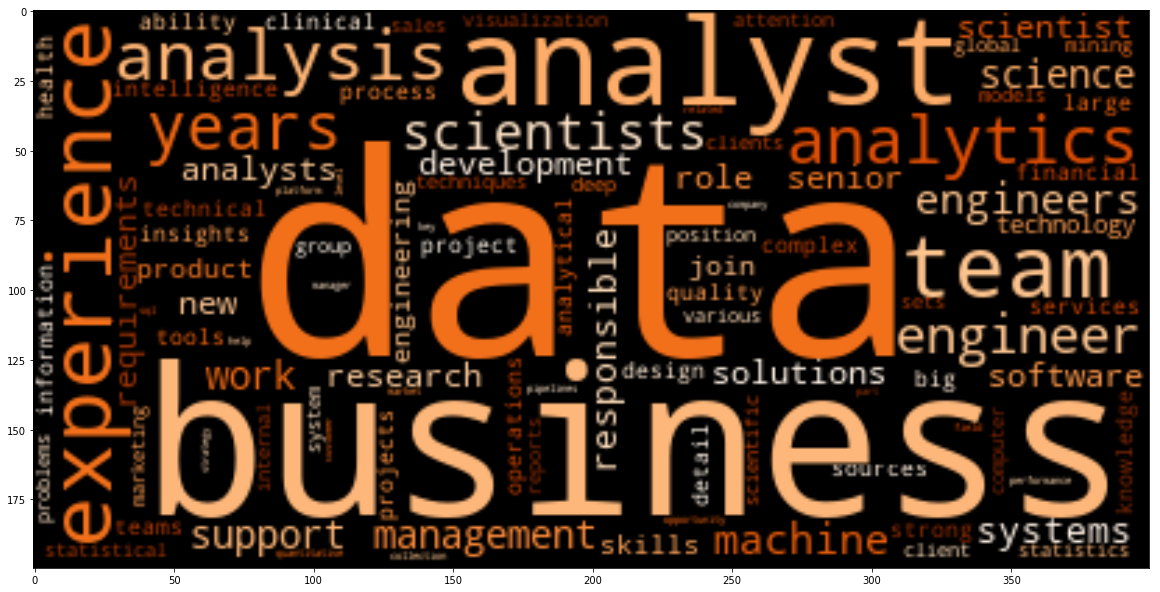

In [1116]:
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")

plt.show()

In [1117]:
bgs = nltk.bigrams(tokens)

In [1118]:
fdist2 = nltk.FreqDist(bgs) # selecting bigrams from tokens

In [1119]:
bgs_100 = fdist2.most_common(100) # top-100 bigrams
bgs_df = pd.DataFrame(bgs_100, columns = ('bigram','count'))
bgs_df.head()

,bigram,count
0,"(business, analyst)",498
1,"(machine, learning)",296
2,"(data, scientists)",261
3,"(data, analyst)",227
4,"(data, science)",204


In [1120]:
bgs_df['phrase'] = bgs_df['bigram'].apply(lambda x: x[0]+" "+x[1]) # merging the tuple into a string

In [1121]:
punctuation = re.compile(r'[-.?!,":;()|0-9]')
bgs_df['filter_bgs'] = bgs_df['phrase'].str.contains(punctuation) # finding strings with numbers and punctuation

In [1122]:
bgs_df.head()

,bigram,count,phrase,filter_bgs
0,"(business, analyst)",498,business analyst,False
1,"(machine, learning)",296,machine learning,False
2,"(data, scientists)",261,data scientists,False
3,"(data, analyst)",227,data analyst,False
4,"(data, science)",204,data science,False


In [1123]:
bgs_df = bgs_df[bgs_df.filter_bgs == False] # removing strings with numbers and punctuation

In [1124]:
bgs_df = bgs_df.drop('bigram', 1)
bgs_df = bgs_df.drop('filter_bgs', 1) # removing the excess columns

In [1125]:
bgs_df.reset_index()
bgs_df.head(10) #Final bigrams

,count,phrase
0,498,business analyst
1,296,machine learning
2,261,data scientists
3,227,data analyst
4,204,data science
5,201,years experience
6,149,data engineer
7,148,data scientist
8,145,data analytics
9,142,data analysis


In [1126]:
tgs = nltk.ngrams(tokens,3)
fdist3 = nltk.FreqDist(tgs) # selecting trigrams from tokens
tgs_100 = fdist3.most_common(100) # top-100 trigrams
tgs_df = pd.DataFrame(tgs_100, columns = ('trigram','count'))
tgs_df.head()


,trigram,count
0,"(experience, business, analyst)",42
1,"(team, data, scientists)",42
2,"(senior, business, analyst)",41
3,"(business, systems, analyst)",39
4,"(years, experience, business)",38


In [1127]:
tgs_df['phrase'] = tgs_df['trigram'].apply(lambda x: x[0]+" "+x[1]+" "+x[2])
                                           #" "+x[3]+" "+x[4])
                                           #+" "+x[3]) # merging the tuple into a string

In [1128]:
tgs_df['filter_tgs'] = tgs_df['phrase'].str.contains(punctuation) # finding strings with numbers and punctuation


In [1129]:
tgs_df.head()

,trigram,count,phrase,filter_tgs
0,"(experience, business, analyst)",42,experience business analyst,False
1,"(team, data, scientists)",42,team data scientists,False
2,"(senior, business, analyst)",41,senior business analyst,False
3,"(business, systems, analyst)",39,business systems analyst,False
4,"(years, experience, business)",38,years experience business,False


In [1130]:
tgs_df = tgs_df[tgs_df.filter_tgs == False] # removing strings with numbers and punctuation
tgs_df = tgs_df.drop('trigram', 1)
tgs_df = tgs_df.drop('filter_tgs', 1) # removing the excess columns

In [1131]:
tgs_df.reset_index()
tgs_df.head(20) #Final trigrams

,count,phrase
0,42,experience business analyst
1,42,team data scientists
2,41,senior business analyst
3,39,business systems analyst
4,38,years experience business
5,37,years experience data
6,33,large data sets
8,29,machine learning techniques
9,28,engineers data scientists
10,27,business intelligence analyst


In [1132]:
subset_pos1 = tgs_df[['phrase', 'count']]
tuples_pos1 = [tuple(x) for x in subset_pos1.values]
d4=dict(tuples_pos1)
#d4['data'] = 4269
d4.items()

dict_items([('experience business analyst', 42), ('team data scientists', 42), ('senior business analyst', 41), ('business systems analyst', 39), ('years experience business', 38), ('years experience data', 37), ('large data sets', 33), ('machine learning techniques', 29), ('engineers data scientists', 28), ('business intelligence analyst', 27), ('data scientists engineers', 25), ('data scientists data', 24), ('business analyst join', 24), ('business analyst responsible', 22), ('business analyst role', 22), ('machine learning data', 22), ('business analyst work', 20), ('data analyst responsible', 19), ('new york city', 19), ('data scientist join', 18), ('data science team', 18), ('business analyst experience', 17), ('data modeling data', 16), ('analysts data scientists', 16), ('machine learning models', 16), ('data science machine', 16), ('data scientists analysts', 15), ('data analyst join', 14), ('data engineers data', 14), ('looking business analyst', 14), ('business analyst support

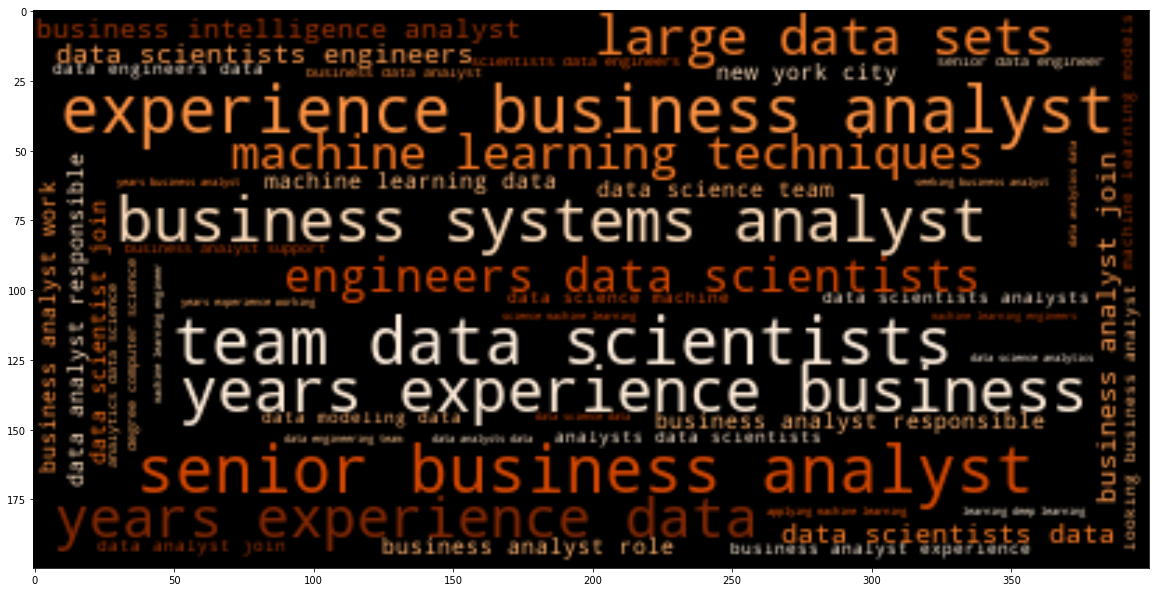

In [1133]:
wordcloud.generate_from_frequencies(d4)
plt.figure(figsize=(20,15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.savefig('filename.jpg', dpi=300)
plt.show()


In [1134]:
# Top data science lang (from KDnuggets) and popu langs from (TIOBE inex)

languages_list = ['R','Python','SAS','SQL','Scala','Java','Javascript','C#','.NET','VBA']
tools_list = ['Hadoop','MS Excel','Tableau','Qlik','Spark','Looker','Power BI','Alteryx']
libraries_list = ['ggplot','ggplot2','shiny','dplyr','tensorflow','scikit-learn','pandas','plotly']

skills_dict = {'languages':languages_list,'tools':tools_list,'libraries':libraries_list}
#^ = Not, \w alphaneumeric chars
#java or javascript
# ( space before or after R
# ds['R'] = ds['Job_Description'].str.contains(' R[^\w]', case=False).astype(int)
skills=[]
#should not be a part of a word [^\w]
for j in skills_dict.keys():
    
    for i in range(len(skills_dict[j])):
        i_regex = '[^\w]' + skills_dict[j][i] + '[^\w]'
        ds_main[skills_dict[j][i]] = ds_main['summary'].str.contains(i_regex, case=False).astype(int)
        total_count = sum(ds_main[skills_dict[j][i]])
        skills.append(skills_dict[j][i] + '  ' +  str(total_count))

#Renaming

# This project is DEPRECATED

In [1135]:
type(skills)

list

In [1136]:
str.split(skills[1])

['Python', '100']

In [1137]:
pd.Series(skills)

0              R  100
1         Python  100
2             SAS  28
3            SQL  114
4           Scala  10
5            Java  21
6       Javascript  7
7               C#  1
8             .NET  2
9              VBA  3
10         Hadoop  25
11        MS Excel  2
12        Tableau  28
13            Qlik  4
14          Spark  31
15          Looker  2
16        Power BI  7
17         Alteryx  2
18          ggplot  3
19         ggplot2  1
20           shiny  0
21           dplyr  0
22      tensorflow  4
23    scikit-learn  4
24          pandas  7
25          plotly  0
dtype: object

In [1138]:
sk=[]
for d in skills:
    sk2=str.split(d)
    sk.append(sk2)

In [1139]:
sk2=pd.DataFrame.from_records(sk,columns=['lan','oc','x'])

In [1140]:
sk2['lan'][13]='MS Excel'
sk2['oc'][13]=2
sk2['lan'][18]='Power BI'
sk2['oc'][18]=2

In [1141]:
sk2=sk2.drop(['x'], axis=1)

In [1142]:
sk2.oc = pd.to_numeric(sk2.oc, errors='coerce')

In [1143]:
sk2=sk2.sort_values(by=['oc'],ascending=False)
sk2.head(20)

,lan,oc
3,SQL,114.0
0,R,100.0
1,Python,100.0
14,Spark,31.0
2,SAS,28.0
12,Tableau,28.0
10,Hadoop,25.0
5,Java,21.0
4,Scala,10.0
6,Javascript,7.0


Text(0,0.5,'Count')

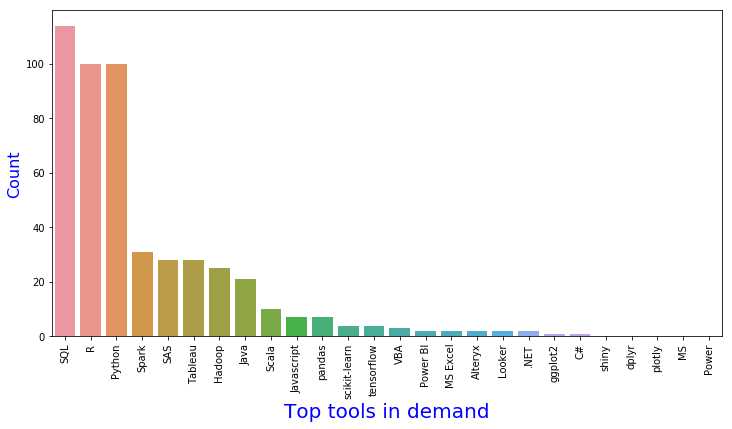

In [1144]:
# Plot graph for top most offered roles
sk2.to_csv('jobs3.csv',index=True)
fig,ax=plt.subplots(figsize=(12,6))
ax=seaborn.barplot(x="lan", y="oc", data=sk2)    
ax.set_xticklabels(sk2['lan'],rotation=90)
ax.set_xlabel('Top tools in demand',fontsize=20,color='blue')
ax.set_ylabel('Count',fontsize=16,color='blue')#